# Logistique

In [17]:
# Bloc non affiché

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix,accuracy_score,r2_score, matthews_corrcoef, make_scorer


def result_model(model,X,Y) :
    Y_model =model.predict(X)

    f1_scor = f1_score(Y,Y_model)
    print('Le f1 score vaut',f1_scor)
    
#     score = cross_val_score(model,X,Y,cv=5,scoring = make_scorer(f1_score))
#     print('F1 cross validé :', np.mean(score))
    
   # Matrice de confusion
    cm_model = confusion_matrix(Y, Y_model)
    plt.rcParams['figure.figsize'] = (5, 5)
    sns.heatmap(cm_model, annot = True)
    plt.title(str(model))
    plt.show()
    
    # return(Y_model)

## Téléchargement des données

In [2]:
train = pd.read_csv("https://www.data.mclavier.com/prj_datascience/train_v2.csv")

## Pre-processing

On sépare dans un premier temps les variables explicatives et la variable à expliquer.

In [3]:
# Variables explicative
exp_var = train.columns[:-1]

# Décomposition features / target
X = train[exp_var]
Y = train['Response']

Ensuite, on décompose en bdd train et test puis on scale les données grâce à sklearn.

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.85)

scaler=StandardScaler() 

X_scal_train = scaler.fit_transform(X_train)
X_scal_test = scaler.transform(X_test) 

X_scal_train = pd.DataFrame(X_scal_train,index= X_train.index, columns=exp_var)
X_scal_test = pd.DataFrame(X_scal_test,index= X_test.index, columns=exp_var)

## Modèle

Puis, nous pouvons directement entrainer le modèle et l'afficher grâce à notre fonction *result_model*.

Le f1 score vaut 1.0


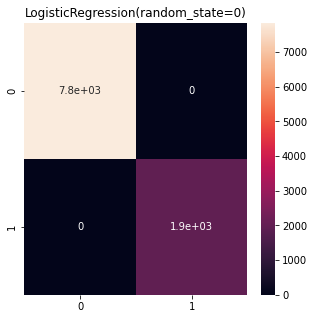

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [16]:
clf = LogisticRegression(random_state=0).fit(X_scal_train, Y_train)
result_model(clf, X_scal_test, Y_test)

Le F1-score n'est pas satisfaisant ce qui est évident au regard de la matrice de confusion. Tout est prédit en positif.

<br><br><br><br>